# Installation

In [1]:
import tensorflow as tf
import os #navigate through file structure

In [2]:
gpus = tf.config.experimental.list_physical_devices('CPU')
len(gpus)

1

In [3]:
#Avoid OOM error (out of memory error)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) #tells, to only take what is really needed
tf.config.list_physical_devices('GPU')
# Check if TensorFlow is able to use a GPU
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import tensorflow as tf
import os #navigate through file structure

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

# Check if TensorFlow is able to use a GPU
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))


Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Image cleaning



#### 1.2 Remove dodgy images

In [6]:
import os
import tensorflow as tf
import cv2 #what allows to do a lot of computer vision things
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data'

In [8]:
#os.listdir(data_dir)
os.listdir(os.path.join(data_dir, 'Apartment House'))

['026.jpg',
 '03_PERSBERICHT_MIX-architectuur_Ede-De-Parkwachter_lowres.jpg',
 '055-vrouwenflat-NL-RtSA_4273_L-3369.jpg',
 '1964_Apartment House_Brown fired clay brick_Light weight Concrete.png',
 '1964_GalleryHouse_Red fired clay brick.png',
 '1964_Maisonette House_Red fired clay brick.png',
 '1965-1974_Apartment House_Brown fired clay brick.png',
 '1965-1974_Maisonette House_Red fired clay brick.png',
 '1975-1991_GalleryHouse_Light weight Concrete.png',
 '1975-1991_Maisonette House_Red fired clay brick.png',
 '1992-2005_Apartment House_Brown fired clay brick.png',
 '1992-2005_GalleryHouse_Red fired clay brick.png',
 '1992-2005_Maisonette House_Red fired clay brick.png',
 '2006-2014_GalleryHouse_Red fired clay brick.png',
 '2006-2014_Maisonette House_Light weight Concrete.png',
 '2017-14_VIEW-05-956x956.jpg',
 '2021-L-flat-Zeist-01a.jpg',
 '22-appartementen-van-tweede-woongebouw-mr-lohmanstraat-op-wo.jpg',
 '322.jpg',
 '327392_753771.jpg',
 '3297-hc-steenenburg-appartementen-001-hrast

In [9]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [10]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
    print(image_class)

Apartment House
Detached House
Semi Detached House
Terrace House


In [13]:
for idx, image_class in enumerate(sorted(os.listdir(data_dir))):
    print(f"{idx}: {image_class}")

0: Apartment House
1: Detached House
2: Semi Detached House
3: Terrace House


In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

026.jpg
03_PERSBERICHT_MIX-architectuur_Ede-De-Parkwachter_lowres.jpg
055-vrouwenflat-NL-RtSA_4273_L-3369.jpg
1964_Apartment House_Brown fired clay brick_Light weight Concrete.png
1964_GalleryHouse_Red fired clay brick.png
1964_Maisonette House_Red fired clay brick.png
1965-1974_Apartment House_Brown fired clay brick.png
1965-1974_Maisonette House_Red fired clay brick.png
1975-1991_GalleryHouse_Light weight Concrete.png
1975-1991_Maisonette House_Red fired clay brick.png
1992-2005_Apartment House_Brown fired clay brick.png
1992-2005_GalleryHouse_Red fired clay brick.png
1992-2005_Maisonette House_Red fired clay brick.png
2006-2014_GalleryHouse_Red fired clay brick.png
2006-2014_Maisonette House_Light weight Concrete.png
2017-14_VIEW-05-956x956.jpg
2021-L-flat-Zeist-01a.jpg
22-appartementen-van-tweede-woongebouw-mr-lohmanstraat-op-wo.jpg
322.jpg
327392_753771.jpg
3297-hc-steenenburg-appartementen-001-hrast.jpg
346.jpg
514.jpg
72fd97ac-2be0-4cc9-a585-504d0b846ae4.jpg
769a02ef-552c-4583-a

In [15]:
img = cv2.imread(os.path.join('data', 'Apartment House', '03_PERSBERICHT_MIX-architectuur_Ede-De-Parkwachter_lowres.jpg'))
#type(img)
img.shape #print pixel height/width/rgb

(840, 1260, 3)

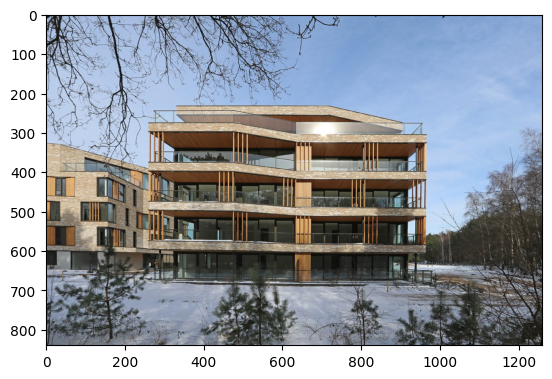

In [16]:
#plt.imshow(img)
#opencv reads image as bga, matplotlib expects rgb
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
# Function to verify image using TensorFlow's decoder
def is_valid_image_tf(image_path):
    try:
        img = tf.io.read_file(image_path)
        ext = image_path.split('.')[-1].lower()

        if ext in ['jpg', 'jpeg']:
            tf.io.decode_jpeg(img)
        elif ext == 'png':
            tf.io.decode_png(img)
        elif ext == 'bmp':
            tf.io.decode_bmp(img)
        else:
            return False

        return True
    except:
        return False

# Loop through all folders and files in the dataset
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_path):
        continue  # skip non-folder items

    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            # Check with OpenCV, imghdr, and TensorFlow
            if tip not in image_exts or img is None or not is_valid_image_tf(image_path):
                print(f"Removing corrupted or invalid image: {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}: {e}")
            os.remove(image_path)


#### 1.2. Augment Images

In [ ]:
import os
import cv2
import numpy as np
import random

def rotate_image(image, angle):
    """Rotate the image by a given angle."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h), borderMode=cv2.BORDER_REPLICATE)
    return rotated

def shift_image(image, x_shift, y_shift):
    """Shift the image by x and y values."""
    (h, w) = image.shape[:2]
    matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shifted = cv2.warpAffine(image, matrix, (w, h), borderMode=cv2.BORDER_REPLICATE)
    return shifted

def zoom_image(image, zoom_factor):
    """Zoom the image by a factor."""
    (h, w) = image.shape[:2]
    zoomed = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)
    # Crop to the original size after zoom
    if zoom_factor > 1:
        start_x = (zoomed.shape[1] - w) // 2
        start_y = (zoomed.shape[0] - h) // 2
        zoomed = zoomed[start_y:start_y+h, start_x:start_x+w]
    else:
        zoomed = cv2.resize(zoomed, (w, h))
    return zoomed

def flip_image(image, flip_type):
    """Flip the image horizontally or vertically."""
    if flip_type == 'horizontal':
        return cv2.flip(image, 1)
    elif flip_type == 'vertical':
        return cv2.flip(image, 0)
    return image

def augment_images(input_folder, output_folder, variations_per_image=20):
    """
    Function to augment images to create a fixed number of variations per image.

    Args:
        input_folder (str): Path to the input folder containing images.
        output_folder (str): Path to save the augmented images.
        variations_per_image (int): The number of variations per image.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    images = [f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    current_count = len(images)
    print(f"Initial count in {input_folder}: {current_count}")

    # For each image in the folder, generate the required number of variations
    for img_name in images:
        img_path = os.path.join(input_folder, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error reading image: {img_path}. Skipping.")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Generate variations for this image
        for i in range(variations_per_image):
            # Randomly apply one of the augmentations
            augmentation_type = random.choice(['rotate', 'shift', 'zoom', 'flip'])
            if augmentation_type == 'rotate':
                angle = random.randint(-30, 30)  # Random angle between -30 and 30 degrees
                augmented_img = rotate_image(img, angle)
            elif augmentation_type == 'shift':
                x_shift = random.randint(-20, 20)  # Random shift on x-axis
                y_shift = random.randint(-20, 20)  # Random shift on y-axis
                augmented_img = shift_image(img, x_shift, y_shift)
            elif augmentation_type == 'zoom':
                zoom_factor = random.uniform(0.8, 1.2)  # Zoom between 0.8 and 1.2
                augmented_img = zoom_image(img, zoom_factor)
            elif augmentation_type == 'flip':
                flip_type = random.choice(['horizontal', 'vertical'])  # Random flip
                augmented_img = flip_image(img, flip_type)

            # Save the augmented image
            output_image_path = os.path.join(output_folder, f"aug_{i+1}_{img_name}")
            augmented_img = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
            cv2.imwrite(output_image_path, augmented_img)

    print(f"Image augmentation complete! Variations per image: {variations_per_image}")

if __name__ == "__main__":
    # Define folder paths for each category
    folder_paths = {
        "Apartment House": "./data/Apartment House",
        "Detached House": "./data/Detached House",
        "Semi Detached House": "./data/Semi Detached House",
        "Terrace House": "./data/Terrace House"
    }

    for category, folder in folder_paths.items():
        print(f"Augmenting images for {category}...")
        augment_images(folder, folder, variations_per_image=20)  # 20 variations per image

    print("Image augmentation complete!")


Augmenting images for Apartment House...
Initial count in ./data/Apartment House: 213


In [20]:
import scipy
print(scipy.__version__)


1.15.2


#### 1.3 Load Data


In [16]:
tf.data.Dataset.list_files
#tf.data.Dataset API

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [19]:
#we use a data pipeline, instead of the keras API for data, this method, we use, is building the dataset on the fly
data = tf.keras.utils.image_dataset_from_directory('data') #actually builds the data pipeline
#in case we want to configure from the default data pipeline... we have can change in here
####data = tf.keras.utils.image_dataset_from_directory('data', batch_size=8) #actually builds the data pipeline

Found 515 files belonging to 4 classes.


In [20]:
data_iterator = data.as_numpy_iterator() #to access image,we need to iterate throught the data

In [21]:
batch = data_iterator.next() #to access the image batches

In [22]:
#there is two parts to the images, 1st are the images and the 2nd is the labels.
batch
# Images represented as numpy arrays
batch[0].shape #Images represented as numpy array

(32, 256, 256, 3)

In [23]:
batch[1] #Batch is the set of images which is used to forward pass iniside a neural network #these are the labels, flag of 0, 1, 0 they represent either brick or concrete

array([1, 3, 2, 0, 0, 1, 0, 2, 3, 1, 1, 0, 3, 3, 1, 3, 0, 0, 0, 1, 2, 3,
       2, 3, 1, 0, 0, 0, 1, 3, 1, 0])

In [87]:
#diktate which class belongs to which number.... we think we can do it tf.data.Dataset API

In [24]:
#Class 0 = brick
#Class 1 = concrete
batch[1]

array([1, 3, 2, 0, 0, 1, 0, 2, 3, 1, 1, 0, 3, 3, 1, 3, 0, 0, 0, 1, 2, 3,
       2, 3, 1, 0, 0, 0, 1, 3, 1, 0])

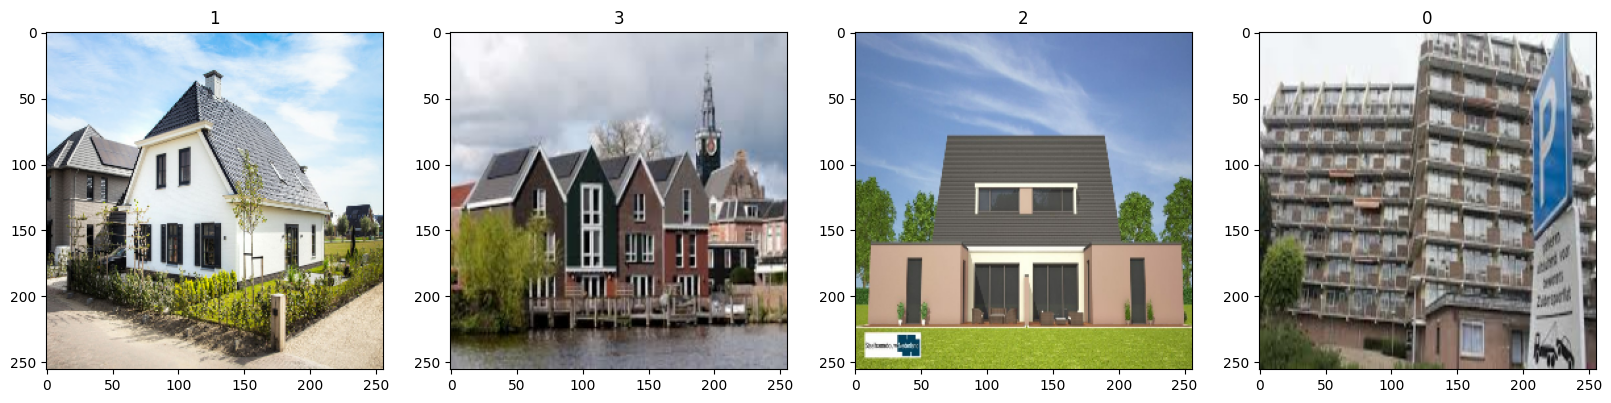

In [25]:
#check which image is assigned to which class
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [90]:
#batch[0].shape
#batch[0].max()

We want to scale the data per batch everytime we load it from the pipeline

In [27]:
scaled = batch[0] /255
scaled.min()

0.0

## Preprocessing Data

#### 2.1 Scale Data

Makes the images between 0 and 1
Apply transformation map on the data pipeline

In [28]:
data = data.map(lambda x,y: (x/255, y)) #map (is a function) which allows us to apply a particular type of transformation, x represent the images (independent features), y is target variables (labels), the /255 is the scaling, we do no transform in y)
#check out tensorflow data api (tf.data.Dataset) #map, #zip (combine set of features and labels) #skip

In [29]:
#take a look at the next batch, use as_numpy_iterator to access the data through the iterator and .next() accesses the next batch
scaled_iterator = data.as_numpy_iterator()

In [35]:
batch = scaled_iterator.next()

In [37]:
batch[1].min()

0

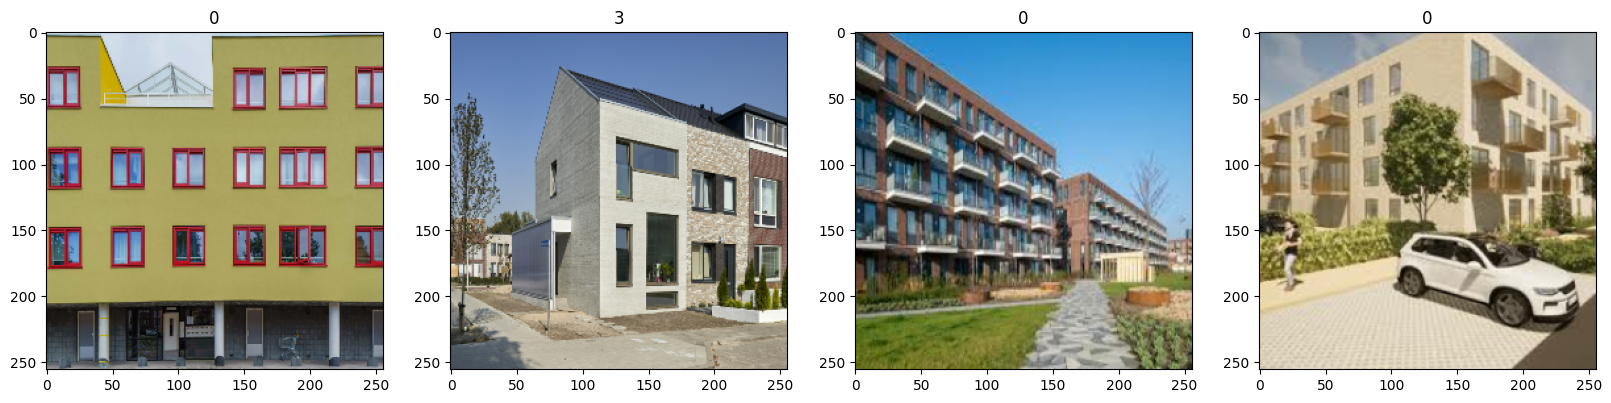

In [38]:
#check which image is assigned to which class
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### 2.2 Split Data

In [39]:
len(data) #number of batches

17

In [148]:
train_size = int(len(data) * 0.5)
val_size = int(len(data) * 0.3)
test_size = int(len(data) * 0.2)

In [149]:
train_size

8

In [150]:
val_size

5

In [151]:
test_size

3

In [152]:
#use #take and #kip method to determine the number of batches use in each of the three datasets
# method #take says how much data we take, and #skip skips the data batches already used before
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [153]:
len(train)

8

## Model

#### 3.1 Build Deep Learing Model

In [154]:
from tensorflow.keras.models import Sequential #quick and easy tasks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #bring in several layers

In [155]:
model = Sequential() #when using sequential class we use add method to chain on the layers

Architecture design decision, eg. AlexNext or other architecture are done differently

In [156]:
MaxPooling2D??

In [157]:
model.add(Conv2D(16, (3, 3),1, activation='relu', input_shape=(256,256,3))) #16 filters, one filter is 3x3pxl in size, and has 1 in stride, how many pixl the filter moves, input_shape is pxl, pxl, rgb
model.add(MaxPooling2D()) #condense information

model.add(Conv2D(32, (3, 3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #after applying the con2d layer, the filters are the last channels, so we condense the rows and width, and the number of filters forms the channel value. flatten decomposes the channel value, to come down to one value

model.add(Dense(256, activation='relu')) #Dense, is MLP fully connected layer
model.add(Dense(4, activation='softmax'))  #multi-class classification 4 classes

Compile, pass through optimiser,

#tf.optimizers. (search for optimsier) #loss: is binary crossentropy because of binary classification method #accuracy, how well the model is performing

In [158]:
from tensorflow.keras import metrics

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [159]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

#### 3.2 Train

here we train the

In [160]:
logdir='log'

In [161]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #log the model while training, we can check how the model training perform in this board

In [162]:
hist=model.fit(train,epochs=20, batch_size=22, validation_data=val,callbacks=[tensorboard_callback])
#.fit is fitting our model, also we do a callback.

Epoch 1/20
8/8 [==============================] - 2s 173ms/step - loss: 1.9137 - accuracy: 0.2617 - val_loss: 1.3211 - val_accuracy: 0.4563
Epoch 2/20
8/8 [==============================] - 2s 179ms/step - loss: 1.3076 - accuracy: 0.4141 - val_loss: 1.2920 - val_accuracy: 0.4000
Epoch 3/20
8/8 [==============================] - 2s 181ms/step - loss: 1.2356 - accuracy: 0.5000 - val_loss: 1.2655 - val_accuracy: 0.4250
Epoch 4/20
8/8 [==============================] - 2s 185ms/step - loss: 1.1920 - accuracy: 0.4570 - val_loss: 1.1778 - val_accuracy: 0.5312
Epoch 5/20
8/8 [==============================] - 2s 183ms/step - loss: 1.1296 - accuracy: 0.5234 - val_loss: 1.1274 - val_accuracy: 0.5125
Epoch 6/20
8/8 [==============================] - 2s 179ms/step - loss: 1.0533 - accuracy: 0.5820 - val_loss: 1.0332 - val_accuracy: 0.6062
Epoch 7/20
8/8 [==============================] - 2s 191ms/step - loss: 1.0725 - accuracy: 0.5234 - val_loss: 1.0648 - val_accuracy: 0.5375
Epoch 8/20
8/8 [====

#### 3.3 Plot Performance

In [163]:
hist

In [164]:
hist.history

{'loss': [1.9136875867843628,
  1.30764639377594,
  1.2355701923370361,
  1.192020058631897,
  1.1295527219772339,
  1.0533082485198975,
  1.0725140571594238,
  0.9767325520515442,
  0.9167577028274536,
  0.8783859014511108,
  0.8198915719985962,
  0.7369756698608398,
  0.6257712244987488,
  0.5325732231140137,
  0.46158644556999207,
  0.39164280891418457,
  0.2972491979598999,
  0.3679943084716797,
  0.275870680809021,
  0.19215872883796692],
 'accuracy': [0.26171875,
  0.4140625,
  0.5,
  0.45703125,
  0.5234375,
  0.58203125,
  0.5234375,
  0.59375,
  0.6328125,
  0.65625,
  0.6875,
  0.6875,
  0.78515625,
  0.79296875,
  0.8359375,
  0.8828125,
  0.9140625,
  0.875,
  0.9140625,
  0.94921875],
 'val_loss': [1.3211331367492676,
  1.2919719219207764,
  1.2654882669448853,
  1.177776575088501,
  1.1274009943008423,
  1.0332188606262207,
  1.0647568702697754,
  0.9351792335510254,
  0.9537307620048523,
  0.8007171750068665,
  0.7923575639724731,
  0.7638761401176453,
  0.69083857536315

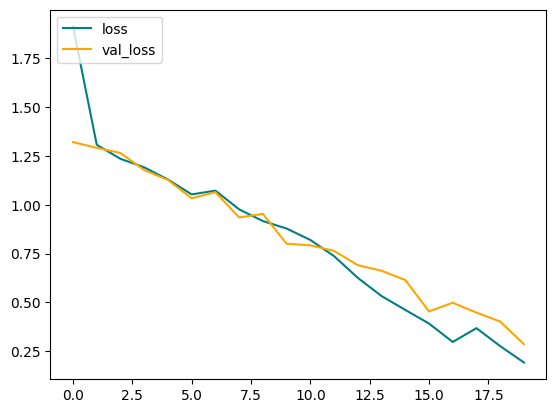

In [165]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc='upper left')
plt.show()

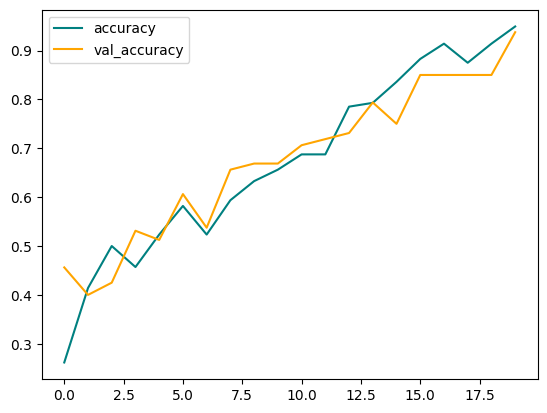

In [166]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

In [53]:
# import matplotlib.pyplot as plt
#
# # Plot recall over epochs
# plt.plot(hist.history['recall'], label='Training Recall')
# if 'val_recall' in hist.history:
#     plt.plot(hist.history['val_recall'], label='Validation Recall')
# plt.xlabel('Epoch')
# plt.ylabel('Recall')
# plt.legend()
# plt.title('Model Recall Over Epochs')
# plt.show()


## 4 Evaluate Performance


#### 4.1 Evaluation

In [167]:
# Import metrics for classification problem precision, recall and accuracy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()


In [168]:
len(test)

3

In [169]:
# Loop through test batches
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)                     # shape: (batch_size, num_classes)
    yhat_classes = np.argmax(yhat, axis=1)      # shape: (batch_size,)

    # Convert labels and predictions to tensors
    y_tensor = tf.convert_to_tensor(y)
    yhat_tensor = tf.convert_to_tensor(yhat_classes)

    pre.update_state(y_tensor, yhat_tensor)
    re.update_state(y_tensor, yhat_tensor)
    acc.update_state(y_tensor, yhat)


1/1 [==============================] - 0s 30ms/step


In [170]:
print(f'Pecisions:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Pecisions:0.9824561476707458, Recall:0.9655172228813171, Accuracy:0.9270833134651184


#### 4.2 Test

In [123]:
import cv2

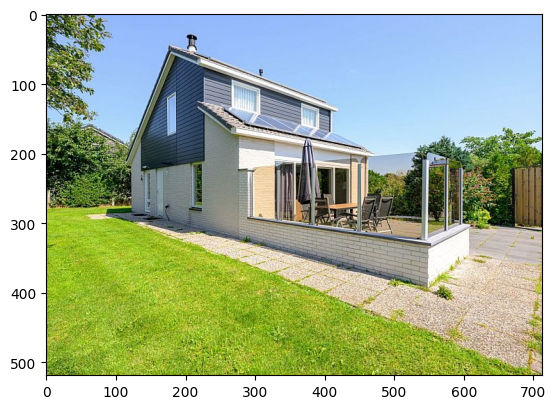

In [124]:
img = cv2.imread('Detach_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

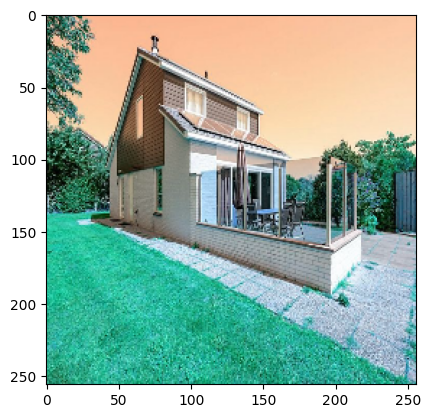

In [125]:
#Resize the image to put it through the network
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [126]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [127]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 17ms/step


In [128]:
print(yhat)

[[0.22358084 0.6704193  0.02983993 0.07615991]]


In [129]:
predicted_class = np.argmax(yhat)
print(f"Predicted class index: {predicted_class}")

Predicted class index: 1


In [130]:
raw_data = tf.keras.utils.image_dataset_from_directory('data')
class_names = raw_data.class_names

# apply the scaling transformation
data = raw_data.map(lambda x, y: (x / 255, y))

Found 515 files belonging to 4 classes.


In [131]:
predicted_class = np.argmax(yhat)
print(f"Predicted class label: {class_names[predicted_class]}")


Predicted class label: Detached House


## Save the Model

#### 5.1 Save the Model

In [117]:
from tensorflow.keras.models import load_model

In [118]:
model.save(os.path.join('models', '2506archetype.h5'))

In [119]:
new_model = load_model(os.path.join('models', '2506archetype.h5'))

In [120]:
os.path.join('models', '2506archetype.h5')

'models\\archetype.h5'

In [122]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))
#where resize is the new image, rescaled to 255
# Get the index of the class with the highest probability
predicted_class = np.argmax(yhatnew, axis=-1)

# Map the predicted class index to the corresponding class label
predicted_class_label = class_names[predicted_class[0]]  # Using the first element in the predicted class

# Print the predicted class label
print(f"Predicted class label: {predicted_class_label}")

1/1 [==============================] - 0s 16ms/step
Predicted class label: Apartment House
